In [395]:
import sys 
sys.path.insert(1, "../")
from workloads.util import use_plots, use_results

import seaborn as sns 
from matplotlib import pyplot as plt
sns.set()

import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [396]:
sns.set_theme(style="whitegrid")
sns.set_theme(style="whitegrid", font_scale=1.7)
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

In [397]:
policy_map = {
    'total_error': 'Regret-Proportional',
    'total_error_cold': 'Regret-Proportional',
    'min_past': 'Minimum-Past', 
    'round_robin': "Round-Robin", 
    'max_pending': "Maximum-Pending", 
    'last_query': "Read-Optimized", 
    "query_proportional": "Query-Proportional",
    "batch": "Batched", 
    'random': "Random"
}
hue_order = ['Regret-Proportional', "Query-Proportional", 'Minimum-Past', "Maximum-Pending", "Round-Robin", "Random", "Batched", "Best-Case"]

In [398]:
def hex_to_rgb(hex):
  rgb = []
  for i in (0, 2, 4):
    decimal = int(hex[i:i+2], 16)
    rgb.append(decimal/256)
  
  return tuple(rgb)


colors = sns.color_palette(as_cmap=True)
#colors_hex = ["d0e2ff", "4589ff", "a8a8a8", "8d8d8d", "6f6f6f", "525252", "393939"]
colors_hex = ["24a148", "ff832b", "002d9c", "0f62fe", "8d8d8d", "a6c8ff", "d0e2ff", "8d8d8d"]
colors = [hex_to_rgb(c) for c in colors_hex]
hue_colors = {hue_order[i]: colors[i] for i in range(len(hue_order))}
hue_colors

{'Regret-Proportional': (0.140625, 0.62890625, 0.28125),
 'Query-Proportional': (0.99609375, 0.51171875, 0.16796875),
 'Minimum-Past': (0.0, 0.17578125, 0.609375),
 'Maximum-Pending': (0.05859375, 0.3828125, 0.9921875),
 'Round-Robin': (0.55078125, 0.55078125, 0.55078125),
 'Random': (0.6484375, 0.78125, 0.99609375),
 'Batched': (0.8125, 0.8828125, 0.99609375),
 'Best-Case': (0.55078125, 0.55078125, 0.55078125)}

## STL Results (yahoo)

In [399]:
plots_dir = use_plots("yahoo_a1", download=False)
stl_df = pd.read_csv(f"{plots_dir}/results.csv")
stl_updates_df = pd.read_csv(f"{plots_dir}/updates.csv")
stl_df["error"] = stl_df["total_error"] 
stl_df["updates"] = stl_df["runtime"].apply(lambda r: int(24/r) if r > 0 else "infinity")
stl_updates_df["updates"] = stl_updates_df["runtime"].apply(lambda r: int(24/r) if r > 0 else "infinity")
# add minimum past and max pending as equivalent to round robin
for eq_policy in ["min_past", "max_pending", "query_proportional"]: 
    policy_df = pd.DataFrame(stl_df[stl_df["policy"] == "round_robin"]) 
    policy_df["policy"] = eq_policy
    stl_df = pd.concat([stl_df, policy_df])
stl_df["workload"] = "Anomaly Detection"
stl_df.policy = stl_df.policy.map(policy_map)
stl_updates_df.policy = stl_updates_df.policy.map(policy_map)


stl_baseline_df = pd.read_csv(f"{plots_dir}/baseline.csv")
stl_upper_bound = stl_baseline_df[stl_baseline_df["policy"] == "All"].total_error.iloc[0]
stl_upper_bound_updates = stl_baseline_df[stl_baseline_df["policy"] == "All"].total_updates.iloc[0]
stl_lower_bound = stl_baseline_df[stl_baseline_df["policy"] == "None"].total_error.iloc[0]
stl_lower_bound_updates = stl_baseline_df[stl_baseline_df["policy"] == "None"].total_updates.iloc[0]

stl_df["error_increase"] = stl_df["error"] - stl_upper_bound

stl_baseline_df

{'results_dir': '/Users/sarahwooders/repos/experiments/data/results', 'dataset_dir': '/Users/sarahwooders/repos/experiments/data/datasets', 'plots_dir': '/Users/sarahwooders/repos/experiments/data/plots', 'aws_dir': 'vldb', 'credentials': '/Users/sarahwooders/repos/experiments/ralf-vldb.json'}


,Unnamed: 0.1,Unnamed: 0,runtime,policy,total_error,average_staleness,total_updates
0,0,0,0,All,90.793787,0.998466,43684
1,0,0,1000000,None,880.302334,325.500000,1


## ALS Results 

Run `workloads/recsys/aggregate_results.py` beforehand.

In [400]:
plots_dir = use_plots("ml-1m-dist", download=True)
als_df = pd.read_csv(f"{plots_dir}/results.csv")
als_updates_df = pd.read_csv(f"{plots_dir}/updates.csv")
als_df["workload"] = "Recommendation"
als_df.policy = als_df.policy.map(policy_map)

#als_baseline_df = pd.read_csv(f"{plots_dir}/baseline.csv")
#als_upper_bound = als_baseline_df[als_baseline_df["updates"] == 10000].error.iloc[0]
#als_upper_bound_updates = als_baseline_df[als_baseline_df["updates"] == 10000].total_updates.iloc[0]
#als_lower_bound = als_baseline_df[als_baseline_df["updates"] == 0].error.iloc[0]
#als_lower_bound_updates = als_baseline_df[als_baseline_df["updates"] == 0].total_updates.iloc[0]

#als_df["error_increase"] = als_df["error"] - als_upper_bound

{'results_dir': '/Users/sarahwooders/repos/experiments/data/results', 'dataset_dir': '/Users/sarahwooders/repos/experiments/data/datasets', 'plots_dir': '/Users/sarahwooders/repos/experiments/data/plots', 'aws_dir': 'vldb', 'credentials': '/Users/sarahwooders/repos/experiments/ralf-vldb.json'}


/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/2928638571.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  als_updates_df = pd.read_csv(f"{plots_dir}/updates.csv")


In [401]:
als_df

,Unnamed: 0,updates,policy,error,total_updates,ts_factor,max_ts,dist,workload
0,0,0.50,Random,1.361335,6014,60,12126,exponential,Recommendation
1,1,0.50,Random,1.325167,6001,60,12100,gaussian,Recommendation
2,2,0.50,Random,1.891122,3010,60,9130,NaN,Recommendation
3,3,0.25,Random,1.825999,3020,60,12126,exponential,Recommendation
4,4,0.25,Random,1.856664,3015,60,12100,gaussian,Recommendation
...,...,...,...,...,...,...,...,...,...
178,178,2.00,Batched,1.184058,8601,60,9130,NaN,Recommendation
179,179,3.00,Batched,1.153824,10356,60,9130,NaN,Recommendation
180,180,4.00,Batched,1.139979,11460,60,9130,NaN,Recommendation
181,181,5.00,Batched,1.135488,11993,60,9130,NaN,Recommendation


# Plot 

## Plot ALS Different Query Distributions

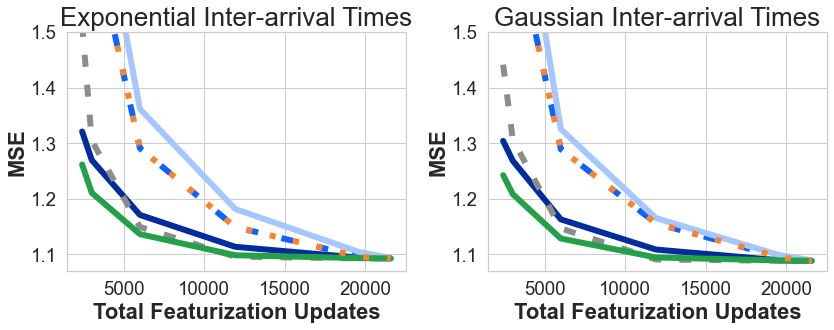

In [402]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
linewidth = 6

legend = False
line_hue_order = ['Minimum-Past', "Maximum-Pending", "Round-Robin", "Random", 'Regret-Proportional', "Query-Proportional"]


# ALS plots 

updates = [0.5, 0.25, 0.2, 1, 2, 3, 4] #1, 2, 3, 4, 5, 8]
dists = ["exponential", "gaussian"]
for dist in dists: 
    i = dists.index(dist)
    
    if dist is None: 
        df = als_df[als_df["dist"].isna()]
    else: 
        df = als_df[als_df["dist"] == dist]
        
    g = sns.lineplot(data=df[df.updates.isin(updates)], x="total_updates", y="error", hue="policy", ax=axes[i], palette=hue_colors, linewidth=linewidth, hue_order=line_hue_order)
    if dist is None: 
        axes[i].set_title(f"Recommendation (Original)", fontsize=26)
    else: 
        axes[i].set_title(f"{dist.capitalize()} Inter-arrival Times", fontsize=26)
        
    axes[i].set(xlabel="Total Featurization Updates",  ylabel="MSE", ylim=(1.07, 1.5))
    axes[i].set_xlabel("Total Featurization Updates", fontsize=22, fontweight="bold")
    axes[i].set_ylabel("MSE", fontsize=22, fontweight="bold")

    #g0.axline((5000, als_upper_bound), (1, als_upper_bound), color='grey') #, linestyle="--")
    #g0.axline((5000, als_lower_bound), (1, als_lower_bound), color='black', linestyle="--")
    g.legend_.remove()

if legend: 
    handles, labels = axes[0].get_legend_handles_labels()
    order = [labels.index(hue_order[labels.index(l)]) for l in labels]
    leg = fig.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=22, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.5, -0.25))

    # set the linewidth of each legend object
    for legobj in leg.legendHandles:
        legobj.set_linewidth(10.0)
   
for i in range(len(line_hue_order)):
    if line_hue_order[i] == "Round-Robin":
        for d in range(len(dists)):
            axes[d].lines[i].set_dashes((2, 3))
    if line_hue_order[i] == "Query-Proportional": 
        for d in range(len(dists)):
            axes[d].lines[i].set_dashes((1, 3))
    if line_hue_order[i] == "Maximum-Pending": 
        for d in range(len(dists)):
            axes[d].lines[i].set_dashes((2, 4))
    
    #axes[1].lines[i].set_alpha(0.6)
    
#fig.legend(handles, labels, bbox_to_anchor=(1.2, 0.8))
#fig.legend(handles, labels, bbox_to_anchor=(1.15, 0.8))
#fig.legend(handles, labels, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.5, 1))
fig.tight_layout()

fig.savefig(f'{plots_dir}/als_dist.pdf', dpi=300, bbox_inches = "tight")

NameError: name 'å' is not defined

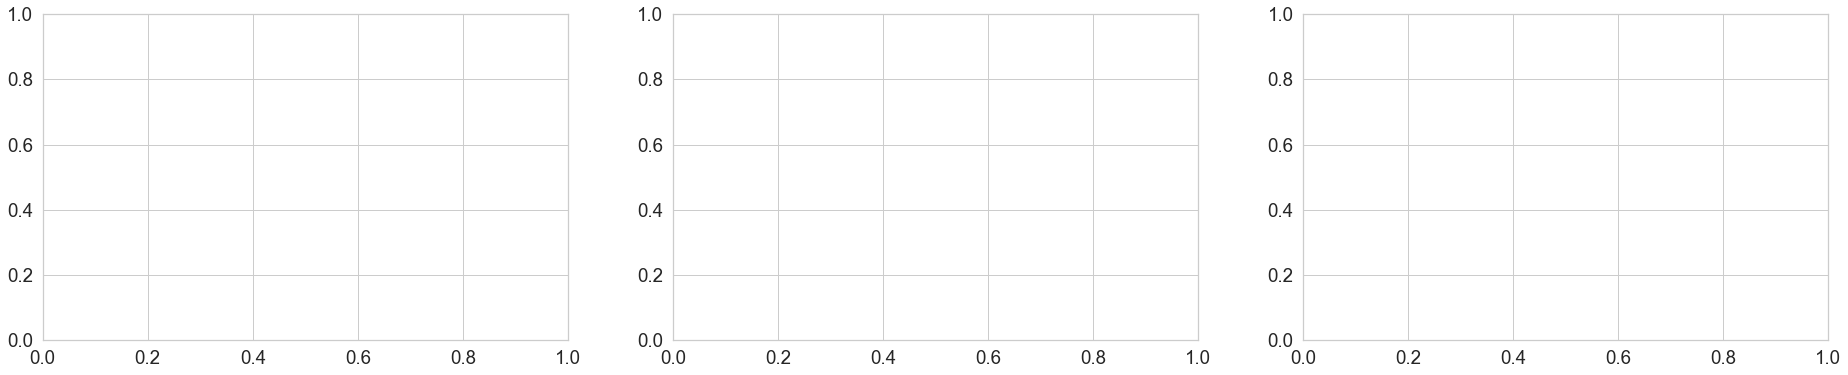

In [403]:
fig, axes = plt.subplots(1, 3, figsize=(32,6))
linewidth = 6


line_hue_order = ['Minimum-Past', "Maximum-Pending", "Round-Robin", "Random", 'Regret-Proportional', "Query-Proportional"]


# ALS plots 

updates = [0.5, 0.25, 0.2, 1, 2, 3, 4] #1, 2, 3, 4, 5, 8]
dists = [None, "exponential", "gaussian"]
for dist in dists: 
    å
    i = dists.index(dist)
    
    if dist is None: 
        df = als_df[als_df["dist"].isna()]
    else: 
        df = als_df[als_df["dist"] == dist]
        
    g = sns.lineplot(data=df[df.updates.isin(updates)], x="total_updates", y="error", hue="policy", ax=axes[i], palette=hue_colors, linewidth=linewidth, hue_order=line_hue_order)
    if dist is None: 
        axes[i].set_title(f"Original", fontsize=26)
    else: 
        axes[i].set_title(f"{dist.capitalize()} Distribution", fontsize=26)
        
    axes[i].set(xlabel="Total Featurization Updates",  ylabel="MSE", ylim=(1.07, 1.5))
    axes[i].set_xlabel("Total Featurization Updates", fontsize=22, fontweight="bold")
    axes[i].set_ylabel("MSE", fontsize=22, fontweight="bold")

    #g0.axline((5000, als_upper_bound), (1, als_upper_bound), color='grey') #, linestyle="--")
    #g0.axline((5000, als_lower_bound), (1, als_lower_bound), color='black', linestyle="--")
    g.legend_.remove()


handles, labels = axes[0].get_legend_handles_labels()
order = [labels.index(hue_order[labels.index(l)]) for l in labels]
leg = fig.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=22, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.5, -0.25))

# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(10.0)
   
for i in range(len(line_hue_order)):
    if line_hue_order[i] == "Round-Robin":
        for d in range(len(dists)):
            axes[d].lines[i].set_dashes((2, 3))
    if line_hue_order[i] == "Query-Proportional": 
        for d in range(len(dists)):
            axes[d].lines[i].set_dashes((1, 3))
    if line_hue_order[i] == "Maximum-Pending": 
        for d in range(len(dists)):
            axes[d].lines[i].set_dashes((2, 4))
    
    #axes[1].lines[i].set_alpha(0.6)
    
#fig.legend(handles, labels, bbox_to_anchor=(1.2, 0.8))
#fig.legend(handles, labels, bbox_to_anchor=(1.15, 0.8))
#fig.legend(handles, labels, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.5, 1))
fig.tight_layout()

fig.savefig(f'{plots_dir}/als_dist.pdf', dpi=300, bbox_inches = "tight")

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(32,12))
linewidth = 6


line_hue_order = ['Minimum-Past', "Maximum-Pending", "Round-Robin", "Random", 'Regret-Proportional', "Query-Proportional"]


# ALS plots 

updates = [0.5, 0.25, 0.2, 1, 2, 3, 4] #1, 2, 3, 4, 5, 8]
dists = ["exponential", "gaussian", None]
for dist in dists: 
    
    i = dists.index(dist)
    
    if dist is None: 
        df = als_df[als_df["dist"].isna()]
    else: 
        df = als_df[als_df["dist"] == dist]
        
    g = sns.lineplot(data=df[df.updates.isin(updates)], x="total_updates", y="error", hue="policy", ax=axes[0][i], palette=hue_colors, linewidth=linewidth, hue_order=line_hue_order)
    axes[0][i].set(title="Recommendation", xlabel="Total Featurization Updates",  ylabel="MSE", ylim=(1.07, 1.5))
    axes[0][i].set_xlabel("Total Featurization Updates", fontsize=22, fontweight="bold")
    axes[0][i].set_ylabel("MSE", fontsize=22, fontweight="bold")
    axes[0][i].set_title("Recommendation", fontsize=26)
    #g0.axline((5000, als_upper_bound), (1, als_upper_bound), color='grey') #, linestyle="--")
    #g0.axline((5000, als_lower_bound), (1, als_lower_bound), color='black', linestyle="--")
    g.legend_.remove()


# STL plots 

updates = [1, 2, 3, 4, 6, 8, 12, 24, 48, 120, 240]
g1 = sns.lineplot(data=stl_df[stl_df.updates.isin(updates)].reset_index(), x="total_updates", y="error", hue="policy", ax=axes[1][0], palette=hue_colors, linewidth=linewidth, hue_order=line_hue_order)
axes[1][0].set(title="Anomaly Detection", xlabel="Total Featurization Updates",  ylabel="Total MASE", ylim=(80, 250))
axes[1][0].set_xlabel("Total Featurization Updates", fontsize=22, fontweight="bold")
axes[1][0].set_ylabel("Total MASE", fontsize=22, fontweight="bold")
axes[1][0].set_title("Anomaly Detection", fontsize=26)
#g1.axline((0, stl_upper_bound), (0.1, stl_upper_bound), color='grey') #, linestyle="--")
#g1.axline((0, stl_lower_bound), (0.1, stl_lower_bound), color='grey') #, linestyle="--")
g1.legend_.remove()


handles, labels = axes[1][0].get_legend_handles_labels()
order = [labels.index(hue_order[labels.index(l)]) for l in labels]
leg = fig.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=22, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.5, -0.25))

# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(10.0)
   
for i in range(len(line_hue_order)):
    if line_hue_order[i] == "Round-Robin":
        for d in range(len(dists)):
            axes[0][d].lines[i].set_dashes((2, 3))
        axes[1][0].lines[i].set_dashes((2, 3))
    if line_hue_order[i] == "Query-Proportional": 
        for d in range(len(dists)):
            axes[0][d].lines[i].set_dashes((1, 3))
        axes[1][0].lines[i].set_dashes((1, 3))
    if line_hue_order[i] == "Maximum-Pending": 
        for d in range(len(dists)):
            axes[0][d].lines[i].set_dashes((2, 4))
        axes[1][0].lines[i].set_dashes((2, 4))
    #if line_hue_order[i] == "Minimum-Past": 
    #    axes[0].lines[i].set_dashes((3, 6))
     #   axes[1].lines[i].set_dashes((3, 6))
    
    #axes[1].lines[i].set_alpha(0.6)
    
#fig.legend(handles, labels, bbox_to_anchor=(1.2, 0.8))
#fig.legend(handles, labels, bbox_to_anchor=(1.15, 0.8))
#fig.legend(handles, labels, loc="lower center", ncol=len(labels), bbox_to_anchor=(0.5, 1))
fig.tight_layout()

#fig.savefig('../data/plots/line_all_no_ir.pdf', dpi=300, bbox_inches = "tight")

# Flink Comparison Results

* `seasonality = 24*60/5`: Represents 24 hours (5 minute samples -> 1 hours -> 24 hour) 
* `window_size = seasonality*3`: Recommended 
* `slide_size = 864/2 = 432`: Equal to window size 

In [613]:
result_dir = use_results("azure/flink", download=True)

In [637]:
slides = [72, 288]
keys = [5, 20, 10, 50, 60, 70, 80, 90, 100]

## Sent Data

In [633]:
sent_data = pd.read_csv(f"{result_dir}/sent_data_72_20.csv")
sent_data.sort_values(by=['ts'], inplace=True)
# Convert 'curr_ts' from milliseconds to seconds
sent_data['ts'] = sent_data['ts'] / 1000

# Convert the 'curr_ts' column to a datetime object
sent_data['time'] = pd.to_datetime(sent_data['ts'], unit='s')

In [646]:
sent_data

,Unnamed: 0,key,cpu,ts,time
11818,11818,208,94.760557,0.0,1970-01-01 00:00:00.000
11819,11819,209,3.746236,0.0,1970-01-01 00:00:00.000
11817,11817,186,2.390449,0.0,1970-01-01 00:00:00.000
11816,11816,182,5.067818,0.0,1970-01-01 00:00:00.000
11815,11815,179,49.540432,0.0,1970-01-01 00:00:00.000
...,...,...,...,...,...
11782,11782,51,8.528888,2591.4,1970-01-01 00:43:11.400
11781,11781,44,9.878497,2591.4,1970-01-01 00:43:11.400
11780,11780,1,20.865172,2591.4,1970-01-01 00:43:11.400
11789,11789,109,3.345287,2591.4,1970-01-01 00:43:11.400


<AxesSubplot:xlabel='ts'>

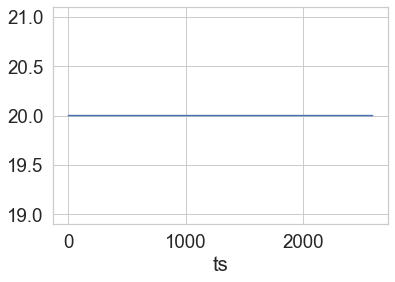

In [635]:
sent_data.groupby("ts").key.count().plot()

## Plot throughput versus number of keys 

In [651]:
slide = slides[0]

data = []
sent_data = []
for k in keys:
    print(f"{result_dir}/results_{slide}_{k}.csv")
    df = pd.read_csv(f"{result_dir}/results_{slide}_{k}.csv") 
    sent_df = pd.read_csv(f"{result_dir}/sent_data_{slide}_{k}.csv")
    sent_df["slide"] = slide
    sent_df["total_keys"] = k 
    
    def find_model_ts(x): 
        return df[(df["key"] == x["key"]) & (df["curr_ts"] <= x["ts"])].output_ts.max()

    sent_df["model_ts"] = sent_df.apply(find_model_ts, axis=1)

    df["slide"] = slide
    df["total_keys"] = k
    data.append(df[["slide", "total_keys", "key", "output_ts", "curr_ts", "staleness"]])
    sent_data.append(sent_df[["slide", "total_keys", "key", "ts", "cpu", "model_ts"]])
    
df = pd.concat(data)
sent_df = pd.concat(sent_data)
df

/Users/sarahwooders/repos/experiments/data/results/azure/flink/results_72_5.csv
/Users/sarahwooders/repos/experiments/data/results/azure/flink/results_72_20.csv
/Users/sarahwooders/repos/experiments/data/results/azure/flink/results_72_10.csv
/Users/sarahwooders/repos/experiments/data/results/azure/flink/results_72_50.csv
/Users/sarahwooders/repos/experiments/data/results/azure/flink/results_72_60.csv
/Users/sarahwooders/repos/experiments/data/results/azure/flink/results_72_70.csv
/Users/sarahwooders/repos/experiments/data/results/azure/flink/results_72_80.csv
/Users/sarahwooders/repos/experiments/data/results/azure/flink/results_72_90.csv
/Users/sarahwooders/repos/experiments/data/results/azure/flink/results_72_100.csv


,slide,total_keys,key,output_ts,curr_ts,staleness
0,72,5,1,258900,261600,2700
1,72,5,44,258900,261600,2700
2,72,5,51,258900,261600,2700
3,72,5,55,258900,261600,2700
4,72,5,63,258900,261600,2700
...,...,...,...,...,...,...
8095,72,100,1676,1986900,2570700,583800
8096,72,100,1686,1986900,2570700,583800
8097,72,100,1747,1986900,2570700,583800
8098,72,100,1818,1986900,2570700,583800


In [653]:
sent_df["staleness"] = sent_df["ts"] - sent_df["model_ts"]
sent_df

,slide,total_keys,key,ts,cpu,model_ts,staleness
0,72,5,1,2387700,21.077653,2375700.0,12000.0
1,72,5,44,2387700,18.162854,2375700.0,12000.0
2,72,5,51,2387700,13.772907,2375700.0,12000.0
3,72,5,55,2387700,3.312263,2375700.0,12000.0
4,72,5,63,2387700,4.257230,2375700.0,12000.0
...,...,...,...,...,...,...,...
863895,72,100,1676,1000800,6.448699,798900.0,201900.0
863896,72,100,1686,1000800,14.498191,798900.0,201900.0
863897,72,100,1747,1000800,28.418368,798900.0,201900.0
863898,72,100,1818,1000800,14.245147,798900.0,201900.0


In [657]:
sent_df.to_csv("sent_df.csv")

In [654]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'curr_ts' from milliseconds to seconds
df['curr_ts'] = df['curr_ts'] / 1000
# Convert the 'curr_ts' column to a datetime object
df['time'] = pd.to_datetime(df['curr_ts'], unit='s')
df['staleness'] = df['staleness'] / 1000 # sent at 1000x the rate  


In [680]:
sent_df = pd.read_csv("sent_df.csv")
sent_df.sort_values(by=['ts'], inplace=True)
# Convert 'curr_ts' from milliseconds to seconds
sent_df['ts'] = sent_df['ts'] / 1000
# Convert the 'curr_ts' column to a datetime object
sent_df['time'] = pd.to_datetime(sent_df['ts'], unit='s')

         Unnamed: 0  slide  total_keys   key       ts        cpu   model_ts  \
0                 0     72           5     1  2387700  21.077653  2375700.0   
1                 1     72           5    44  2387700  18.162854  2375700.0   
2                 2     72           5    51  2387700  13.772907  2375700.0   
3                 3     72           5    55  2387700   3.312263  2375700.0   
4                 4     72           5    63  2387700   4.257230  2375700.0   
...             ...    ...         ...   ...      ...        ...        ...   
4189910      863895     72         100  1676  1000800   6.448699   798900.0   
4189911      863896     72         100  1686  1000800  14.498191   798900.0   
4189912      863897     72         100  1747  1000800  28.418368   798900.0   
4189913      863898     72         100  1818  1000800  14.245147   798900.0   
4189914      863899     72         100  1830  1000800   3.850467   798900.0   

         staleness  
0             12.0  
1        

In [681]:
# Group the DataFrame by 'slide' and resample it over 5-minute windows, calculating the mean 'staleness' within each window
result_df = sent_df.groupby('total_keys').rolling('1T', on='time')['staleness'].mean().reset_index()

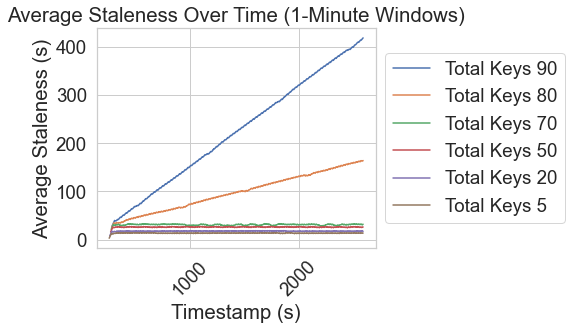

In [684]:
start = result_df.time.min()
# Plot the results for each slide
fig = plt.figure(figsize=(8, 5))  # Set the figure size to (16, 5)
for nkeys in [90, 80, 70, 50, 20, 5]: #result_df['total_keys'].unique():
    slide_data = result_df[result_df['total_keys'] == nkeys]
    ts = slide_data['time'] - start
    ts = ts.apply(lambda x: x.total_seconds())
    plt.plot(ts, slide_data['staleness'], label=f'Total Keys {nkeys}')

    
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.xlabel('Timestamp (s)')
plt.ylabel('Average Staleness (s)')
plt.title('Average Staleness Over Time (1-Minute Windows)')


# Move the legend to the right side and prevent overlap
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.grid(True)

fig.tight_layout()

fig.savefig(f'{plots_dir}/flink.pdf', dpi=300, bbox_inches = "tight")

plt.show()

<AxesSubplot:xlabel='total_keys'>

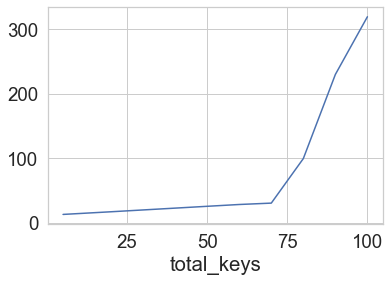

In [685]:
sent_df.groupby('total_keys').staleness.mean().plot()

In [376]:
slide = [1, 24, 48, 72]
data = []
for s in slide:
    df = pd.read_csv(f"{result_dir}/results_{s}.csv") 
    df["slide"] = s
    data.append(df[["slide", "key", "output_ts", "curr_ts", "staleness"]])
    
df = pd.concat(data)
df

,slide,key,output_ts,curr_ts,staleness
0,1,65,1297200,1789500,492300
1,1,80,1295700,1789500,493800
2,1,85,1296300,1789500,493200
3,1,85,1295700,1789500,493800
4,1,99,1296900,1789500,492600
...,...,...,...,...,...
147,72,96,1340400,2550300,1209900
148,72,11,1341300,2550300,1209000
149,72,22,1341300,2550300,1209000
150,72,23,1342500,2550300,1207800


<AxesSubplot:xlabel='slide'>

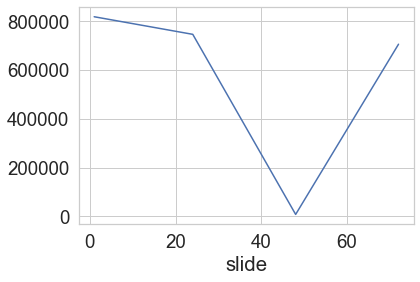

In [377]:
df.groupby("slide").staleness.mean().plot()

In [378]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'curr_ts' from milliseconds to seconds
df['curr_ts'] = df['curr_ts'] / 1000

# Convert the 'curr_ts' column to a datetime object
df['curr_ts'] = pd.to_datetime(df['curr_ts'], unit='s')

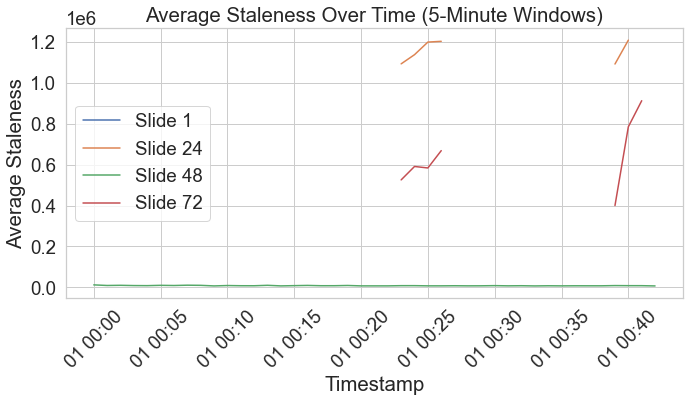

In [379]:
# Group the DataFrame by 'slide' and resample it over 5-minute windows, calculating the mean 'staleness' within each window
result_df = df.groupby('slide').resample('1T', on='curr_ts')['staleness'].mean().reset_index()

# Plot the results for each slide
fig = plt.figure(figsize=(10, 6))
for slide in result_df['slide'].unique():
    slide_data = result_df[result_df['slide'] == slide]
    plt.plot(slide_data['curr_ts'], slide_data['staleness'], label=f'Slide {slide}')

    
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

plt.xlabel('Timestamp')
plt.ylabel('Average Staleness')
plt.title('Average Staleness Over Time (5-Minute Windows)')
plt.legend()
plt.grid(True)
fig.tight_layout()
plt.show()

# Past Predictiveness 

* linear regression CV - will tune
* See what happens with and without offset
* provide window - should figure out that last point is most important 

In [840]:
data_dir = use_results("yahoo_A1_window_48_keys_67_length_700/round_robin_0_A1", download=False)
filename = f"{data_dir}/simulation_predictions.csv"
stl_df = pd.read_csv(filename)
stl_df.columns = ['ts', 'y_pred', 'y_true', 'staleness', 'key']
stl_df

,ts,y_pred,y_true,staleness,key
0,0,0.032859,0.076970,0,1
1,1,0.093368,0.063933,1,1
2,2,0.071843,0.149733,1,1
3,3,0.083161,0.041479,1,1
4,4,0.093230,0.089318,1,1
...,...,...,...,...,...
43679,647,-0.708341,1.000000,1,67
43680,648,5.499994,12.000000,1,67
43681,649,42.166662,19.000000,1,67
43682,650,25.583331,45.000000,1,67


In [737]:
data_dir = use_results("ml-1m", download=False)
filename = f"{data_dir}/round_robin_None_60_split_0.5_results.csv"
als_df = pd.read_csv(filename)
als_df

,Unnamed: 0,y_true,y_pred,user_id,movie_id,timestamp
0,0,4,4.134009,2783,1396,0
1,1,5,1.359328,2783,2901,0
2,2,4,4.235560,3970,3408,1
3,3,4,1.000000,3970,2890,2
4,4,4,1.000000,2782,1265,10
...,...,...,...,...,...,...
12018,12018,5,1.000000,2689,1396,5509
12019,12019,5,1.000000,2689,3347,5509
12020,12020,5,1.000000,2689,3361,5509
12021,12021,5,1.000000,2689,356,5509


### Regression

In [717]:
def fill_timestamps(df): 
    min_timestamp = df.index.min()
    max_timestamp = df.index.max()

    # Create a new index with all integers between the min and max timestamps
    new_index = pd.RangeIndex(start=min_timestamp, stop=max_timestamp+1)
    # Reindex the Series with the new index and fill missing values with 0
    df = df.reindex(new_index, fill_value=0)
    df["timestamp"] = new_index
    return df

In [719]:
als_df['squared_error'] = (als_df['y_true'] - als_df['y_pred']) ** 2

In [720]:
stl_df["error"] =         e = mean_absolute_scaled_error(
            df[df["key"] == key].y_pred, 
            df[df["key"] == key].y_true, 
            y_train=df[df["key"] == key].y_true
        )

,Unnamed: 0,y_true,y_pred,user_id,movie_id,timestamp,squared_error
8000,8000,5,1.0,2732,1374,3636,16.0
8001,8001,5,1.0,2732,1375,3636,16.0
8002,8002,5,1.0,2732,1376,3636,16.0
8003,8003,4,1.0,2732,2393,3636,9.0
8004,8004,5,1.0,2732,329,3636,16.0
...,...,...,...,...,...,...,...
12018,12018,5,1.0,2689,1396,5509,16.0
12019,12019,5,1.0,2689,3347,5509,16.0
12020,12020,5,1.0,2689,3361,5509,16.0
12021,12021,5,1.0,2689,356,5509,16.0


In [721]:
top_users = df['user_id'].iloc[8000:].value_counts().nlargest(20).index
top_users

Int64Index([3471, 2731, 4169, 2700, 2724, 2752, 2730, 4728, 2692, 2719, 2701,
            2693, 2748, 2703, 2727, 2726, 2718, 2699, 2689, 2694],
           dtype='int64')

In [722]:
print(df.squared_error.mean(), df.squared_error.min(), df.squared_error.max())

7.493655554954071 0.0 16.0


In [760]:
cache = {}

In [841]:
#Fit model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegressionCV, LassoCV, ElasticNet
from sklearn.metrics import mean_squared_error
from sktime.performance_metrics.forecasting import mean_absolute_scaled_error
import numpy as np

def compute_window_error(df, W):
    unique_keys = df['key'].unique()
    results = []
    
    for key in unique_keys:
        key_df = df[df['key'] == key]

        # Iterate through the rows within the rolling window
        for i in range(W, len(key_df), W):
            window = key_df.iloc[i-W:i]

            # Check if the window has enough data points
            if len(window) < W:
                error = np.nan  # Fill with NaN if the window is too small
            else:
                error = mean_absolute_scaled_error(
                    window['y_pred'], 
                    window['y_true'], 
                    y_train=key_df.y_true
                )

            # Append the result to the list
            results.append({"key": key, "error": error, "ts": key_df.iloc[i-W]["ts"]})

    # Add the results as a new column in the original DataFrame
    return pd.DataFrame(results) 


results = []

for W in [2, 4, 8, 16, 32]:
        
    error_df = compute_window_error(stl_df, 2).dropna()
    print(error_df)
        
    for offset in [0, 2, 4, 8]: 

        x = []
        y = []
        # Compute rolling window
        for user_id in error_df['key'].unique()[:20]: # only for a single key 
            user_df = error_df[error_df["key"] == user_id]
            print(user_df)
            x += [error_df['error'].iloc[i:i+W].tolist() for i in range(len(user_df) - W - offset)]
            y += [error_df['error'].iloc[i+W+offset].tolist() for i in range(len(user_df) - W - offset)]
            #x += [[error_df['error'].iloc[i].tolist()] for i in range(len(user_df) - offset - 1)]
            #y += [error_df['error'].iloc[i+1+offset].tolist() for i in range(len(user_df) - offset - 1)]

        # Split the data into training and testing sets (50/50 split)
        #print(x, y)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

        # Initialize and fit a linear regression model
        model = ElasticNet()
        model.fit(x_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(x_test)

        # Calculate Mean Squared Error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        y_avg = sum(y_train) / len(y_train)
        baseline_mse = mean_squared_error(y_test, len(y_test) * [y_avg])
        print(offset, W, mse, "data size", len(y), "baseline", baseline_mse)
        results.append({"mse": mse, "window_size": W, "baseline_mse": baseline_mse, "offset": offset, "key": user_id})


       key     error     ts
0        1  0.940041    0.0
1        1  1.528355    2.0
2        1  0.529310    4.0
3        1  0.367171    6.0
4        1  1.804411    8.0
...    ...       ...    ...
21770   67  0.720851  640.0
21771   67  0.895494  642.0
21772   67  0.408219  644.0
21773   67  0.253700  646.0
21774   67  0.511711  648.0

[21775 rows x 3 columns]
     key     error     ts
0      1  0.940041    0.0
1      1  1.528355    2.0
2      1  0.529310    4.0
3      1  0.367171    6.0
4      1  1.804411    8.0
..   ...       ...    ...
320    1  1.312024  640.0
321    1  2.179110  642.0
322    1  2.003231  644.0
323    1  2.801045  646.0
324    1  4.133106  648.0

[325 rows x 3 columns]
     key     error     ts
325    2  1.122780    0.0
326    2  1.177418    2.0
327    2  1.125345    4.0
328    2  1.418032    6.0
329    2  0.888964    8.0
..   ...       ...    ...
645    2  4.472779  640.0
646    2  5.865159  642.0
647    2  4.300912  644.0
648    2  4.191378  646.0
649    2  6.3150

      key     error     ts
1625    6  0.948342    0.0
1626    6  1.367800    2.0
1627    6  1.427072    4.0
1628    6  2.870861    6.0
1629    6  1.563852    8.0
...   ...       ...    ...
1945    6  0.500007  640.0
1946    6  1.335885  642.0
1947    6  1.471145  644.0
1948    6  0.436176  646.0
1949    6  1.338924  648.0

[325 rows x 3 columns]
      key     error     ts
1950    7  4.087189    0.0
1951    7  7.339081    2.0
1952    7  4.613409    4.0
1953    7  2.554987    6.0
1954    7  2.066330    8.0
...   ...       ...    ...
2270    7  0.126860  640.0
2271    7  0.039870  642.0
2272    7  0.013180  644.0
2273    7  0.028337  646.0
2274    7  0.041518  648.0

[325 rows x 3 columns]
      key     error     ts
2275    8  0.643940    0.0
2276    8  1.080190    2.0
2277    8  2.249817    4.0
2278    8  0.933118    6.0
2279    8  0.539598    8.0
...   ...       ...    ...
2595    8  3.435343  640.0
2596    8  2.721841  642.0
2597    8  2.883820  644.0
2598    8  1.614820  646.0
2599   

4 2 0.4826477515662863 data size 6380 baseline 0.4826477515662861
     key     error     ts
0      1  0.940041    0.0
1      1  1.528355    2.0
2      1  0.529310    4.0
3      1  0.367171    6.0
4      1  1.804411    8.0
..   ...       ...    ...
320    1  1.312024  640.0
321    1  2.179110  642.0
322    1  2.003231  644.0
323    1  2.801045  646.0
324    1  4.133106  648.0

[325 rows x 3 columns]
     key     error     ts
325    2  1.122780    0.0
326    2  1.177418    2.0
327    2  1.125345    4.0
328    2  1.418032    6.0
329    2  0.888964    8.0
..   ...       ...    ...
645    2  4.472779  640.0
646    2  5.865159  642.0
647    2  4.300912  644.0
648    2  4.191378  646.0
649    2  6.315092  648.0

[325 rows x 3 columns]
     key     error     ts
650    3  0.858170    0.0
651    3  1.047783    2.0
652    3  0.692622    4.0
653    3  0.447211    6.0
654    3  1.747124    8.0
..   ...       ...    ...
970    3  0.826132  640.0
971    3  0.441302  642.0
972    3  1.345786  644.0
97

      key     error     ts
4550   15  0.150625    0.0
4551   15  0.066599    2.0
4552   15  0.275212    4.0
4553   15  0.682106    6.0
4554   15  0.420131    8.0
...   ...       ...    ...
4870   15  1.538529  640.0
4871   15  2.304080  642.0
4872   15  0.879764  644.0
4873   15  0.753538  646.0
4874   15  1.801168  648.0

[325 rows x 3 columns]
      key     error     ts
4875   16  0.433210    0.0
4876   16  1.400031    2.0
4877   16  0.388657    4.0
4878   16  0.438427    6.0
4879   16  0.099173    8.0
...   ...       ...    ...
5195   16  0.275586  640.0
5196   16  1.448798  642.0
5197   16  2.334045  644.0
5198   16  2.103640  646.0
5199   16  1.085025  648.0

[325 rows x 3 columns]
      key     error     ts
5200   17  0.359696    0.0
5201   17  0.466046    2.0
5202   17  3.643133    4.0
5203   17  3.078826    6.0
5204   17  1.306784    8.0
...   ...       ...    ...
5520   17  1.697754  640.0
5521   17  1.319215  642.0
5522   17  1.515834  644.0
5523   17  1.765037  646.0
5524   

      key      error     ts
3250   11   3.260583    0.0
3251   11   5.324245    2.0
3252   11   3.563672    4.0
3253   11   5.926479    6.0
3254   11  11.820853    8.0
...   ...        ...    ...
3570   11   4.867161  640.0
3571   11   3.076792  642.0
3572   11   2.961099  644.0
3573   11   3.597580  646.0
3574   11   0.803543  648.0

[325 rows x 3 columns]
      key     error     ts
3575   12  1.967860    0.0
3576   12  3.799023    2.0
3577   12  2.320992    4.0
3578   12  2.577298    6.0
3579   12  2.628560    8.0
...   ...       ...    ...
3895   12  0.650732  640.0
3896   12  0.579536  642.0
3897   12  0.283361  644.0
3898   12  0.743287  646.0
3899   12  1.255899  648.0

[325 rows x 3 columns]
      key     error     ts
3900   13  0.180876    0.0
3901   13  0.084419    2.0
3902   13  0.259189    4.0
3903   13  0.624200    6.0
3904   13  0.432916    8.0
...   ...       ...    ...
4220   13  1.567411  640.0
4221   13  2.340567  642.0
4222   13  0.907444  644.0
4223   13  0.767897  6

       key     error     ts
0        1  0.940041    0.0
1        1  1.528355    2.0
2        1  0.529310    4.0
3        1  0.367171    6.0
4        1  1.804411    8.0
...    ...       ...    ...
21770   67  0.720851  640.0
21771   67  0.895494  642.0
21772   67  0.408219  644.0
21773   67  0.253700  646.0
21774   67  0.511711  648.0

[21775 rows x 3 columns]
     key     error     ts
0      1  0.940041    0.0
1      1  1.528355    2.0
2      1  0.529310    4.0
3      1  0.367171    6.0
4      1  1.804411    8.0
..   ...       ...    ...
320    1  1.312024  640.0
321    1  2.179110  642.0
322    1  2.003231  644.0
323    1  2.801045  646.0
324    1  4.133106  648.0

[325 rows x 3 columns]
     key     error     ts
325    2  1.122780    0.0
326    2  1.177418    2.0
327    2  1.125345    4.0
328    2  1.418032    6.0
329    2  0.888964    8.0
..   ...       ...    ...
645    2  4.472779  640.0
646    2  5.865159  642.0
647    2  4.300912  644.0
648    2  4.191378  646.0
649    2  6.3150

      key     error     ts
3575   12  1.967860    0.0
3576   12  3.799023    2.0
3577   12  2.320992    4.0
3578   12  2.577298    6.0
3579   12  2.628560    8.0
...   ...       ...    ...
3895   12  0.650732  640.0
3896   12  0.579536  642.0
3897   12  0.283361  644.0
3898   12  0.743287  646.0
3899   12  1.255899  648.0

[325 rows x 3 columns]
      key     error     ts
3900   13  0.180876    0.0
3901   13  0.084419    2.0
3902   13  0.259189    4.0
3903   13  0.624200    6.0
3904   13  0.432916    8.0
...   ...       ...    ...
4220   13  1.567411  640.0
4221   13  2.340567  642.0
4222   13  0.907444  644.0
4223   13  0.767897  646.0
4224   13  1.869385  648.0

[325 rows x 3 columns]
      key     error     ts
4225   14  4.985368    0.0
4226   14  1.440204    2.0
4227   14  1.861875    4.0
4228   14  6.307886    6.0
4229   14  1.958265    8.0
...   ...       ...    ...
4545   14  1.024396  640.0
4546   14  0.171899  642.0
4547   14  0.083635  644.0
4548   14  0.311701  646.0
4549   

      key     error     ts
5200   17  0.359696    0.0
5201   17  0.466046    2.0
5202   17  3.643133    4.0
5203   17  3.078826    6.0
5204   17  1.306784    8.0
...   ...       ...    ...
5520   17  1.697754  640.0
5521   17  1.319215  642.0
5522   17  1.515834  644.0
5523   17  1.765037  646.0
5524   17  1.070012  648.0

[325 rows x 3 columns]
      key     error     ts
5525   18  0.469135    0.0
5526   18  0.859149    2.0
5527   18  0.625046    4.0
5528   18  1.572273    6.0
5529   18  1.608724    8.0
...   ...       ...    ...
5845   18  0.868425  640.0
5846   18  0.939306  642.0
5847   18  0.912902  644.0
5848   18  0.557157  646.0
5849   18  0.664229  648.0

[325 rows x 3 columns]
      key     error     ts
5850   19  0.709564    0.0
5851   19  0.618235    2.0
5852   19  1.896855    4.0
5853   19  2.241098    6.0
5854   19  2.086539    8.0
...   ...       ...    ...
6170   19  7.822762  640.0
6171   19  6.944590  642.0
6172   19  5.500873  644.0
6173   19  3.533768  646.0
6174   

       key     error     ts
0        1  0.940041    0.0
1        1  1.528355    2.0
2        1  0.529310    4.0
3        1  0.367171    6.0
4        1  1.804411    8.0
...    ...       ...    ...
21770   67  0.720851  640.0
21771   67  0.895494  642.0
21772   67  0.408219  644.0
21773   67  0.253700  646.0
21774   67  0.511711  648.0

[21775 rows x 3 columns]
     key     error     ts
0      1  0.940041    0.0
1      1  1.528355    2.0
2      1  0.529310    4.0
3      1  0.367171    6.0
4      1  1.804411    8.0
..   ...       ...    ...
320    1  1.312024  640.0
321    1  2.179110  642.0
322    1  2.003231  644.0
323    1  2.801045  646.0
324    1  4.133106  648.0

[325 rows x 3 columns]
     key     error     ts
325    2  1.122780    0.0
326    2  1.177418    2.0
327    2  1.125345    4.0
328    2  1.418032    6.0
329    2  0.888964    8.0
..   ...       ...    ...
645    2  4.472779  640.0
646    2  5.865159  642.0
647    2  4.300912  644.0
648    2  4.191378  646.0
649    2  6.3150

      key     error     ts
975     4  3.217575    0.0
976     4  1.032861    2.0
977     4  4.591096    4.0
978     4  3.221655    6.0
979     4  1.414319    8.0
...   ...       ...    ...
1295    4  0.832952  640.0
1296    4  0.800994  642.0
1297    4  1.508833  644.0
1298    4  0.626924  646.0
1299    4  0.607205  648.0

[325 rows x 3 columns]
      key     error     ts
1300    5  1.039746    0.0
1301    5  2.998695    2.0
1302    5  3.313680    4.0
1303    5  3.287925    6.0
1304    5  2.441895    8.0
...   ...       ...    ...
1620    5  0.413144  640.0
1621    5  0.596114  642.0
1622    5  1.116542  644.0
1623    5  2.703025  646.0
1624    5  3.236330  648.0

[325 rows x 3 columns]
      key     error     ts
1625    6  0.948342    0.0
1626    6  1.367800    2.0
1627    6  1.427072    4.0
1628    6  2.870861    6.0
1629    6  1.563852    8.0
...   ...       ...    ...
1945    6  0.500007  640.0
1946    6  1.335885  642.0
1947    6  1.471145  644.0
1948    6  0.436176  646.0
1949   

      key     error     ts
6175   20  1.257617    0.0
6176   20  0.920076    2.0
6177   20  1.363504    4.0
6178   20  0.804299    6.0
6179   20  3.369372    8.0
...   ...       ...    ...
6495   20  0.076237  640.0
6496   20  0.244856  642.0
6497   20  0.096059  644.0
6498   20  0.340987  646.0
6499   20  0.145668  648.0

[325 rows x 3 columns]
4 16 0.5244082849320002 data size 6100 baseline 0.5244082849320002
     key     error     ts
0      1  0.940041    0.0
1      1  1.528355    2.0
2      1  0.529310    4.0
3      1  0.367171    6.0
4      1  1.804411    8.0
..   ...       ...    ...
320    1  1.312024  640.0
321    1  2.179110  642.0
322    1  2.003231  644.0
323    1  2.801045  646.0
324    1  4.133106  648.0

[325 rows x 3 columns]
     key     error     ts
325    2  1.122780    0.0
326    2  1.177418    2.0
327    2  1.125345    4.0
328    2  1.418032    6.0
329    2  0.888964    8.0
..   ...       ...    ...
645    2  4.472779  640.0
646    2  5.865159  642.0
647    2  4.300

      key     error     ts
3900   13  0.180876    0.0
3901   13  0.084419    2.0
3902   13  0.259189    4.0
3903   13  0.624200    6.0
3904   13  0.432916    8.0
...   ...       ...    ...
4220   13  1.567411  640.0
4221   13  2.340567  642.0
4222   13  0.907444  644.0
4223   13  0.767897  646.0
4224   13  1.869385  648.0

[325 rows x 3 columns]
      key     error     ts
4225   14  4.985368    0.0
4226   14  1.440204    2.0
4227   14  1.861875    4.0
4228   14  6.307886    6.0
4229   14  1.958265    8.0
...   ...       ...    ...
4545   14  1.024396  640.0
4546   14  0.171899  642.0
4547   14  0.083635  644.0
4548   14  0.311701  646.0
4549   14  0.381037  648.0

[325 rows x 3 columns]
      key     error     ts
4550   15  0.150625    0.0
4551   15  0.066599    2.0
4552   15  0.275212    4.0
4553   15  0.682106    6.0
4554   15  0.420131    8.0
...   ...       ...    ...
4870   15  1.538529  640.0
4871   15  2.304080  642.0
4872   15  0.879764  644.0
4873   15  0.753538  646.0
4874   

      key     error     ts
1625    6  0.948342    0.0
1626    6  1.367800    2.0
1627    6  1.427072    4.0
1628    6  2.870861    6.0
1629    6  1.563852    8.0
...   ...       ...    ...
1945    6  0.500007  640.0
1946    6  1.335885  642.0
1947    6  1.471145  644.0
1948    6  0.436176  646.0
1949    6  1.338924  648.0

[325 rows x 3 columns]
      key     error     ts
1950    7  4.087189    0.0
1951    7  7.339081    2.0
1952    7  4.613409    4.0
1953    7  2.554987    6.0
1954    7  2.066330    8.0
...   ...       ...    ...
2270    7  0.126860  640.0
2271    7  0.039870  642.0
2272    7  0.013180  644.0
2273    7  0.028337  646.0
2274    7  0.041518  648.0

[325 rows x 3 columns]
      key     error     ts
2275    8  0.643940    0.0
2276    8  1.080190    2.0
2277    8  2.249817    4.0
2278    8  0.933118    6.0
2279    8  0.539598    8.0
...   ...       ...    ...
2595    8  3.435343  640.0
2596    8  2.721841  642.0
2597    8  2.883820  644.0
2598    8  1.614820  646.0
2599   

8 32 0.5374023828381596 data size 5700 baseline 0.5374023828381596


In [842]:
window_error_df = pd.DataFrame(results)
window_error_df

,mse,window_size,baseline_mse,offset,key
0,0.520462,2,0.520462,0,20
1,0.514811,2,0.514811,2,20
2,0.482648,2,0.482648,4,20
3,0.513962,2,0.513962,8,20
4,0.514811,4,0.514811,0,20
5,0.482648,4,0.482648,2,20
6,0.511045,4,0.511045,4,20
7,0.504311,4,0.504311,8,20
8,0.511045,8,0.511045,0,20
9,0.513962,8,0.513962,2,20


In [843]:
window_error_df.groupby(["window_size", "offset"]).mse.mean().reset_index()

,window_size,offset,mse
0,2,0,0.520462
1,2,2,0.514811
2,2,4,0.482648
3,2,8,0.513962
4,4,0,0.514811
5,4,2,0.482648
6,4,4,0.511045
7,4,8,0.504311
8,8,0,0.511045
9,8,2,0.513962


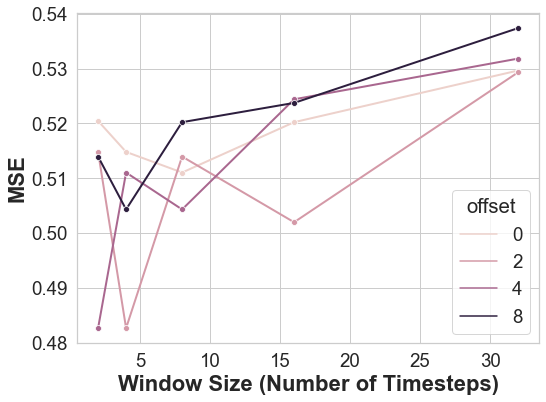

In [844]:
fig, axes = plt.subplots(1, 1, figsize=(8,6))
linewidth = 2

data_df = window_error_df.groupby(["window_size", "offset"]).mse.mean().reset_index()
g = sns.lineplot(data=data_df, marker="o", y="mse", x="window_size", hue="offset", axes=axes, linewidth=linewidth)                                                                                                
axes.set_xlabel("Window Size (Number of Timesteps)", fontsize=22, fontweight="bold")
axes.set_ylabel("MSE", fontsize=22, fontweight="bold")

fig.savefig(f'{plots_dir}/predict_error.pdf', dpi=300, bbox_inches = "tight")

fig.tight_layout()

In [732]:
#Fit model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegressionCV, LassoCV, ElasticNet
from sklearn.metrics import mean_squared_error

results = []
for offset in [0, 1, 2, 4, 8, 32]: 

    for W in [1, 2, 3, 4, 5, 6, 7, 8, 16, 32]:
        
        if f"{offset}_{W}" in cache: 
            results.append(cache[f"{offset}_{W}"])
            continue 

        # Compute rolling window
        x = []
        y = []
        for user_id in top_users: 
            user_df = df[df["user_id"] == user_id]
            user_df = fill_timestamps(user_df)
            x += [df['squared_error'].iloc[i:i+W].tolist() for i in range(len(df) - W - offset)]
            y += [df['squared_error'].iloc[i+W+offset].tolist() for i in range(len(df) - W - offset)]

        # Split the data into training and testing sets (50/50 split)
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

        # Initialize and fit a linear regression model
        model = ElasticNet()
        model.fit(x_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(x_test)

        # Calculate Mean Squared Error (MSE)
        mse = mean_squared_error(y_test, y_pred)
        y_avg = sum(y_train) / len(y_train)
        baseline_mse = mean_squared_error(y_test, len(y_test) * [y_avg])
        print(offset, W, mse, "data size", len(y), "baseline", baseline_mse)
        results.append({"mse": mse, "window_size": W, "baseline_mse": baseline_mse, "offset": offset})
        cache[f"{offset}_{W}"] = {"mse": mse, "window_size": W, "baseline_mse": baseline_mse, "offset": offset}


0 1 27.20148134976627 data size 240440 baseline 31.570855009303433
0 2 25.72647548580394 data size 240420 baseline 31.539375009990685
0 3 25.230568054344854 data size 240400 baseline 31.51924888540565
0 4 24.90316251014861 data size 240380 baseline 31.502720385012797
0 5 24.762995593458722 data size 240360 baseline 31.556999177054585
0 6 24.56296055723894 data size 240340 baseline 31.470797422660393
0 7 24.5081270056954 data size 240320 baseline 31.562002628933215
0 8 24.37214461296502 data size 240300 baseline 31.57857593968521
0 16 23.950531427920133 data size 240140 baseline 31.513260515403108
0 32 23.90793795063716 data size 239820 baseline 31.532688365539663
1 1 27.967756486209968 data size 240420 baseline 31.539375009990685
1 2 26.905782594605725 data size 240400 baseline 31.51924888540565
1 3 26.366649318915904 data size 240380 baseline 31.502720385012797
1 4 26.091542921170632 data size 240360 baseline 31.556999177054585
1 5 25.806349668316713 data size 240340 baseline 31.47079

In [733]:
window_error_df = pd.DataFrame(results)

In [734]:
window_error_df

,mse,window_size,baseline_mse,offset
0,27.201481,1,31.570855,0
1,25.726475,2,31.539375,0
2,25.230568,3,31.519249,0
3,24.903163,4,31.502720,0
4,24.762996,5,31.556999,0
5,24.562961,6,31.470797,0
6,24.508127,7,31.562003,0
7,24.372145,8,31.578576,0
8,23.950531,16,31.513261,0
9,23.907938,32,31.532688,0


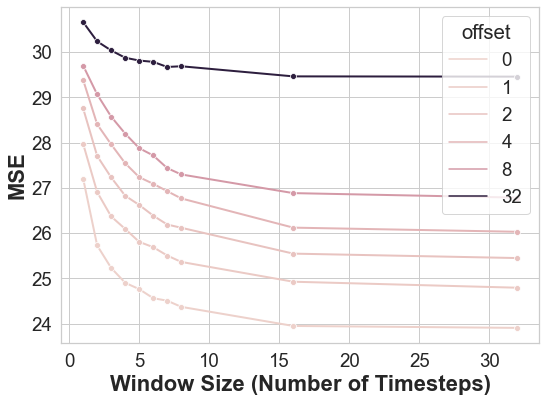

In [735]:
fig, axes = plt.subplots(1, 1, figsize=(8,6))
linewidth = 2

g = sns.lineplot(data=window_error_df, marker="o", y="mse", x="window_size", hue="offset", axes=axes, linewidth=linewidth)
#g = sns.lineplot(data=window_error_df, marker="o", y="baseline_mse", x="window_size", axes=axes, linewidth=linewidth, label="Baseline")
#g.axline((1, 31), (32, 31), color='black', linestyle="--", label="Baseline")
#axes.set(title="Predictiveness of Future Error", xlabel="Total Featurization Updates",  ylabel="Top-1 Error", ylim=(0.5, 0.95))
                                                                                                    
axes.set_xlabel("Window Size (Number of Timesteps)", fontsize=22, fontweight="bold")
axes.set_ylabel("MSE", fontsize=22, fontweight="bold")
#axes.set_title("Predictiveness of Future Error", fontsize=26)

# Add legends based on the "legend_label:" comments
#handles, labels = axes.get_legend_handles_labels()
#print(handles, labels)
#axes.legend(handles, labels)

fig.savefig(f'{plots_dir}/predict_error.pdf', dpi=300, bbox_inches = "tight")

fig.tight_layout()

<AxesSubplot:xlabel='window_size'>

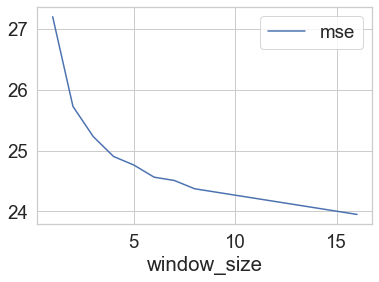

In [527]:
pd.DataFrame(results).plot(x="window_size", y="mse")

In [364]:
def find_model_ts(x): 
    return update_df[(update_df["key"] == x["user_id"]) & (update_df["time"] <= x["timestamp"])].time.max()

df["staleness"] = df.apply(find_model_ts, axis=1)

<AxesSubplot:>

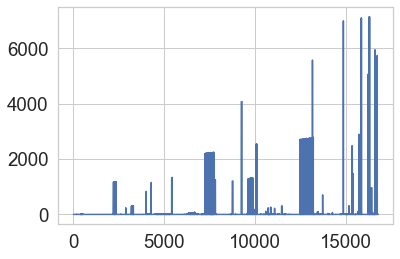

In [370]:
(df["timestamp"] - df["staleness"]).plot()

In [33]:
data_dir = use_results("ml-1m", download=False)

In [347]:
filename = f"{data_dir}/round_robin_None_60_split_0.5_results.csv"
df = pd.read_csv(filename)
df

,Unnamed: 0,y_true,y_pred,user_id,movie_id,timestamp
0,0,4,4.134009,2783,1396,0
1,1,5,1.359328,2783,2901,0
2,2,4,4.235560,3970,3408,1
3,3,4,1.000000,3970,2890,2
4,4,4,1.000000,2782,1265,10
...,...,...,...,...,...,...
12018,12018,5,1.000000,2689,1396,5509
12019,12019,5,1.000000,2689,3347,5509
12020,12020,5,1.000000,2689,3361,5509
12021,12021,5,1.000000,2689,356,5509


In [348]:
df.user_id.value_counts()

2777    807
3471    486
2761    483
2743    439
2753    406
       ... 
4448      1
3020      1
3971      1
3693      1
3688      1
Name: user_id, Length: 155, dtype: int64

In [349]:
count_df = df[df["user_id"] == 2777].groupby("timestamp").y_true.count()




In [350]:
df.user_id.value_counts()

2777    807
3471    486
2761    483
2743    439
2753    406
       ... 
4448      1
3020      1
3971      1
3693      1
3688      1
Name: user_id, Length: 155, dtype: int64

In [351]:
import warnings

# Suppress ValueWarnings from statsmodels
warnings.filterwarnings('ignore', category=Warning, module='statsmodels')


In [352]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from tqdm import tqdm 

user_ids = [2753]
df = df[df["user_id"].isin(user_ids)]

# Assuming your DataFrame is called df
# Sort the DataFrame by user_id and timestamp
df.sort_values(by=['user_id', 'timestamp'], inplace=True)
# Define the size of the time windows
#window_size = 7  # You can adjust this as needed

df['squared_error'] = (df['y_true'] - df['y_pred']) ** 2

# Create a function to fit ARIMA model and calculate MSE for a user_id within a time window
def fit_arima_and_calculate_mse_within_window(user_data):
    mse_list = []

    for i in range(1, len(user_data)):
        if i >= window_size:
            window_data = user_data.iloc[i - window_size:i]
            print(window_data)

            # Fit ARIMA model (you may need to optimize p, d, q)
            model = ARIMA(window_data['squared_error'])
            model_fit = model.fit()

            # Make a one-step-ahead prediction for the current time window
            prediction = model_fit.forecast(steps=1).values[0]

            # Calculate MSE for this prediction
            #print(window_data.iloc[-1]['squared_error'], prediction)
            mse = mean_squared_error([window_data.iloc[-1]['squared_error']], [prediction])
            mse_list.append({"mse": mse, "prediction": prediction, "actual":  window_data.iloc[-1]['squared_error']})

    return mse_list

# Initialize a DataFrame to store MSE results for each user_id and time window
mse_results = pd.DataFrame(columns=['user_id', 'time_window', 'mse', "prediction", "actual", "window"])

for window_size in [2, 4, 8, 16, 32, 64]:
    # Iterate over unique user_ids
    for user_id, user_data in df.groupby('user_id'):
        print(user_data)
                # Group by the 'timestamp' column and aggregate the data
        user_data = user_data.groupby('timestamp').agg({
            'user_id': 'first',  # Keep the first user_id value in the group
            'squared_error': 'sum'  # Sum the squared_error values in the group
        }).reset_index("timestamp")
        user_data.set_index('timestamp', inplace=True)
        print(user_data)
        user_data = fill_timestamps(user_data)
        print("USER", user_data)
        if len(user_data) >= window_size * 2:
            mse_list = fit_arima_and_calculate_mse_within_window(user_data[:200])

            # Append results to mse_results DataFrame
            for i, mse in tqdm(enumerate(mse_list)):
                #print(mse)
                d = {**{'user_id': user_id, 'time_window': i+1, "window": window_size}, **mse}
                mse_results = mse_results.append(d, ignore_index=True)


/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['user_id', 'timestamp'], inplace=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['squared_error'] = (df['y_true'] - df['y_pred']) ** 2


      Unnamed: 0  y_true  y_pred  user_id  movie_id  timestamp  squared_error
4314        4314       4     1.0     2753      3447       2956            9.0
4315        4315       3     1.0     2753      1197       2956            4.0
4316        4316       4     1.0     2753      1210       2956            9.0
4323        4323       4     1.0     2753      3101       2957            9.0
4324        4324       2     1.0     2753      2346       2957            1.0
...          ...     ...     ...      ...       ...        ...            ...
5214        5214       4     1.0     2753      2186       3039            9.0
5215        5215       4     1.0     2753      3551       3039            9.0
5216        5216       4     1.0     2753      2762       3039            9.0
5217        5217       4     1.0     2753      2917       3039            9.0
5218        5218       4     1.0     2753      1219       3039            9.0

[406 rows x 7 columns]
           user_id  squared_error
timest

      user_id  squared_error  timestamp
3019        0            0.0       3019
3020     2753           18.0       3020
      user_id  squared_error  timestamp
3020     2753           18.0       3020
3021     2753           78.0       3021
      user_id  squared_error  timestamp
3021     2753           78.0       3021
3022     2753           52.0       3022
      user_id  squared_error  timestamp
3022     2753           52.0       3022
3023     2753           77.0       3023
      user_id  squared_error  timestamp
3023     2753           77.0       3023
3024     2753           22.0       3024
      user_id  squared_error  timestamp
3024     2753           22.0       3024
3025     2753           17.0       3025
      user_id  squared_error  timestamp
3025     2753           17.0       3025
3026     2753           52.0       3026
      user_id  squared_error  timestamp
3026     2753           52.0       3026
3027     2753            9.0       3027
      user_id  squared_error  timestamp


0it [00:00, ?it/s]/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pa

/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
32it [00:00, 99.64it/s]/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed fr

/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
65it [00:00, 95.42it/s] /var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed f

      Unnamed: 0  y_true  y_pred  user_id  movie_id  timestamp  squared_error
4314        4314       4     1.0     2753      3447       2956            9.0
4315        4315       3     1.0     2753      1197       2956            4.0
4316        4316       4     1.0     2753      1210       2956            9.0
4323        4323       4     1.0     2753      3101       2957            9.0
4324        4324       2     1.0     2753      2346       2957            1.0
...          ...     ...     ...      ...       ...        ...            ...
5214        5214       4     1.0     2753      2186       3039            9.0
5215        5215       4     1.0     2753      3551       3039            9.0
5216        5216       4     1.0     2753      2762       3039            9.0
5217        5217       4     1.0     2753      2917       3039            9.0
5218        5218       4     1.0     2753      1219       3039            9.0

[406 rows x 7 columns]
           user_id  squared_error
timest

      user_id  squared_error  timestamp
2995        0            0.0       2995
2996     2753           51.0       2996
2997     2753           22.0       2997
2998     2753           66.0       2998
      user_id  squared_error  timestamp
2996     2753           51.0       2996
2997     2753           22.0       2997
2998     2753           66.0       2998
2999     2753           63.0       2999
      user_id  squared_error  timestamp
2997     2753           22.0       2997
2998     2753           66.0       2998
2999     2753           63.0       2999
3000     2753          169.0       3000
      user_id  squared_error  timestamp
2998     2753           66.0       2998
2999     2753           63.0       2999
3000     2753          169.0       3000
3001     2753           93.0       3001
      user_id  squared_error  timestamp
2999     2753           63.0       2999
3000     2753          169.0       3000
3001     2753           93.0       3001
3002     2753           71.0       3002


0it [00:00, ?it/s]/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pa

/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
35it [00:00, 110.05it/s]/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed f

/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
70it [00:00, 110.78it/s]/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed f

      Unnamed: 0  y_true  y_pred  user_id  movie_id  timestamp  squared_error
4314        4314       4     1.0     2753      3447       2956            9.0
4315        4315       3     1.0     2753      1197       2956            4.0
4316        4316       4     1.0     2753      1210       2956            9.0
4323        4323       4     1.0     2753      3101       2957            9.0
4324        4324       2     1.0     2753      2346       2957            1.0
...          ...     ...     ...      ...       ...        ...            ...
5214        5214       4     1.0     2753      2186       3039            9.0
5215        5215       4     1.0     2753      3551       3039            9.0
5216        5216       4     1.0     2753      2762       3039            9.0
5217        5217       4     1.0     2753      2917       3039            9.0
5218        5218       4     1.0     2753      1219       3039            9.0

[406 rows x 7 columns]
           user_id  squared_error
timest

      user_id  squared_error  timestamp
2980     2753           26.0       2980
2981     2753           29.0       2981
2982     2753           26.0       2982
2983     2753           30.0       2983
2984     2753           18.0       2984
2985     2753           18.0       2985
2986     2753           31.0       2986
2987     2753           22.0       2987
      user_id  squared_error  timestamp
2981     2753           29.0       2981
2982     2753           26.0       2982
2983     2753           30.0       2983
2984     2753           18.0       2984
2985     2753           18.0       2985
2986     2753           31.0       2986
2987     2753           22.0       2987
2988     2753            8.0       2988
      user_id  squared_error  timestamp
2982     2753           26.0       2982
2983     2753           30.0       2983
2984     2753           18.0       2984
2985     2753           18.0       2985
2986     2753           31.0       2986
2987     2753           22.0       2987


      user_id  squared_error  timestamp
3005     2753           37.0       3005
3006     2753           34.0       3006
3007     2753           45.0       3007
3008     2753           39.0       3008
3009     2753           22.0       3009
3010     2753           60.0       3010
3011     2753           11.0       3011
3012     2753           38.0       3012
      user_id  squared_error  timestamp
3006     2753           34.0       3006
3007     2753           45.0       3007
3008     2753           39.0       3008
3009     2753           22.0       3009
3010     2753           60.0       3010
3011     2753           11.0       3011
3012     2753           38.0       3012
3013     2753           18.0       3013
      user_id  squared_error  timestamp
3007     2753           45.0       3007
3008     2753           39.0       3008
3009     2753           22.0       3009
3010     2753           60.0       3010
3011     2753           11.0       3011
3012     2753           38.0       3012


      user_id  squared_error  timestamp
3030     2753     142.972227       3030
3031     2753      19.000000       3031
3032     2753      84.000000       3032
3033     2753     109.000000       3033
3034     2753       8.000000       3034
3035        0       0.000000       3035
3036        0       0.000000       3036
3037     2753     106.000000       3037
      user_id  squared_error  timestamp
3031     2753           19.0       3031
3032     2753           84.0       3032
3033     2753          109.0       3033
3034     2753            8.0       3034
3035        0            0.0       3035
3036        0            0.0       3036
3037     2753          106.0       3037
3038     2753           27.0       3038


0it [00:00, ?it/s]/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pa

/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
36it [00:00, 107.28it/s]/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed f

/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future v

      Unnamed: 0  y_true  y_pred  user_id  movie_id  timestamp  squared_error
4314        4314       4     1.0     2753      3447       2956            9.0
4315        4315       3     1.0     2753      1197       2956            4.0
4316        4316       4     1.0     2753      1210       2956            9.0
4323        4323       4     1.0     2753      3101       2957            9.0
4324        4324       2     1.0     2753      2346       2957            1.0
...          ...     ...     ...      ...       ...        ...            ...
5214        5214       4     1.0     2753      2186       3039            9.0
5215        5215       4     1.0     2753      3551       3039            9.0
5216        5216       4     1.0     2753      2762       3039            9.0
5217        5217       4     1.0     2753      2917       3039            9.0
5218        5218       4     1.0     2753      1219       3039            9.0

[406 rows x 7 columns]
           user_id  squared_error
timest

      user_id  squared_error  timestamp
2967     2753      82.000000       2967
2968     2753      67.981524       2968
2969     2753      59.000000       2969
2970     2753      61.000000       2970
2971     2753      65.000000       2971
2972     2753      50.000000       2972
2973     2753      43.000000       2973
2974     2753      34.000000       2974
2975     2753      50.000000       2975
2976     2753      77.000000       2976
2977     2753      13.000000       2977
2978     2753      39.898425       2978
2979     2753      64.000000       2979
2980     2753      26.000000       2980
2981     2753      29.000000       2981
2982     2753      26.000000       2982
      user_id  squared_error  timestamp
2968     2753      67.981524       2968
2969     2753      59.000000       2969
2970     2753      61.000000       2970
2971     2753      65.000000       2971
2972     2753      50.000000       2972
2973     2753      43.000000       2973
2974     2753      34.000000       2974


      user_id  squared_error  timestamp
2980     2753           26.0       2980
2981     2753           29.0       2981
2982     2753           26.0       2982
2983     2753           30.0       2983
2984     2753           18.0       2984
2985     2753           18.0       2985
2986     2753           31.0       2986
2987     2753           22.0       2987
2988     2753            8.0       2988
2989     2753            8.0       2989
2990     2753           31.0       2990
2991     2753           22.0       2991
2992     2753            4.0       2992
2993        0            0.0       2993
2994        0            0.0       2994
2995        0            0.0       2995
      user_id  squared_error  timestamp
2981     2753           29.0       2981
2982     2753           26.0       2982
2983     2753           30.0       2983
2984     2753           18.0       2984
2985     2753           18.0       2985
2986     2753           31.0       2986
2987     2753           22.0       2987


      user_id  squared_error  timestamp
3004     2753           92.0       3004
3005     2753           37.0       3005
3006     2753           34.0       3006
3007     2753           45.0       3007
3008     2753           39.0       3008
3009     2753           22.0       3009
3010     2753           60.0       3010
3011     2753           11.0       3011
3012     2753           38.0       3012
3013     2753           18.0       3013
3014     2753            8.0       3014
3015     2753           11.0       3015
3016     2753            1.0       3016
3017     2753           12.0       3017
3018     2753           13.0       3018
3019        0            0.0       3019
      user_id  squared_error  timestamp
3005     2753           37.0       3005
3006     2753           34.0       3006
3007     2753           45.0       3007
3008     2753           39.0       3008
3009     2753           22.0       3009
3010     2753           60.0       3010
3011     2753           11.0       3011


      user_id  squared_error  timestamp
3017     2753      12.000000       3017
3018     2753      13.000000       3018
3019        0       0.000000       3019
3020     2753      18.000000       3020
3021     2753      78.000000       3021
3022     2753      52.000000       3022
3023     2753      77.000000       3023
3024     2753      22.000000       3024
3025     2753      17.000000       3025
3026     2753      52.000000       3026
3027     2753       9.000000       3027
3028     2753      27.000000       3028
3029        0       0.000000       3029
3030     2753     142.972227       3030
3031     2753      19.000000       3031
3032     2753      84.000000       3032
      user_id  squared_error  timestamp
3018     2753      13.000000       3018
3019        0       0.000000       3019
3020     2753      18.000000       3020
3021     2753      78.000000       3021
3022     2753      52.000000       3022
3023     2753      77.000000       3023
3024     2753      22.000000       3024


0it [00:00, ?it/s]/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pa

36it [00:00, 117.20it/s]/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed f

68it [00:00, 116.39it/s]


      Unnamed: 0  y_true  y_pred  user_id  movie_id  timestamp  squared_error
4314        4314       4     1.0     2753      3447       2956            9.0
4315        4315       3     1.0     2753      1197       2956            4.0
4316        4316       4     1.0     2753      1210       2956            9.0
4323        4323       4     1.0     2753      3101       2957            9.0
4324        4324       2     1.0     2753      2346       2957            1.0
...          ...     ...     ...      ...       ...        ...            ...
5214        5214       4     1.0     2753      2186       3039            9.0
5215        5215       4     1.0     2753      3551       3039            9.0
5216        5216       4     1.0     2753      2762       3039            9.0
5217        5217       4     1.0     2753      2917       3039            9.0
5218        5218       4     1.0     2753      1219       3039            9.0

[406 rows x 7 columns]
           user_id  squared_error
timest

      user_id  squared_error  timestamp
2966     2753      48.000000       2966
2967     2753      82.000000       2967
2968     2753      67.981524       2968
2969     2753      59.000000       2969
2970     2753      61.000000       2970
2971     2753      65.000000       2971
2972     2753      50.000000       2972
2973     2753      43.000000       2973
2974     2753      34.000000       2974
2975     2753      50.000000       2975
2976     2753      77.000000       2976
2977     2753      13.000000       2977
2978     2753      39.898425       2978
2979     2753      64.000000       2979
2980     2753      26.000000       2980
2981     2753      29.000000       2981
2982     2753      26.000000       2982
2983     2753      30.000000       2983
2984     2753      18.000000       2984
2985     2753      18.000000       2985
2986     2753      31.000000       2986
2987     2753      22.000000       2987
2988     2753       8.000000       2988
2989     2753       8.000000       2989


      user_id  squared_error  timestamp
2977     2753      13.000000       2977
2978     2753      39.898425       2978
2979     2753      64.000000       2979
2980     2753      26.000000       2980
2981     2753      29.000000       2981
2982     2753      26.000000       2982
2983     2753      30.000000       2983
2984     2753      18.000000       2984
2985     2753      18.000000       2985
2986     2753      31.000000       2986
2987     2753      22.000000       2987
2988     2753       8.000000       2988
2989     2753       8.000000       2989
2990     2753      31.000000       2990
2991     2753      22.000000       2991
2992     2753       4.000000       2992
2993        0       0.000000       2993
2994        0       0.000000       2994
2995        0       0.000000       2995
2996     2753      51.000000       2996
2997     2753      22.000000       2997
2998     2753      66.000000       2998
2999     2753      63.000000       2999
3000     2753     169.000000       3000


      user_id  squared_error  timestamp
2988     2753            8.0       2988
2989     2753            8.0       2989
2990     2753           31.0       2990
2991     2753           22.0       2991
2992     2753            4.0       2992
2993        0            0.0       2993
2994        0            0.0       2994
2995        0            0.0       2995
2996     2753           51.0       2996
2997     2753           22.0       2997
2998     2753           66.0       2998
2999     2753           63.0       2999
3000     2753          169.0       3000
3001     2753           93.0       3001
3002     2753           71.0       3002
3003     2753           58.0       3003
3004     2753           92.0       3004
3005     2753           37.0       3005
3006     2753           34.0       3006
3007     2753           45.0       3007
3008     2753           39.0       3008
3009     2753           22.0       3009
3010     2753           60.0       3010
3011     2753           11.0       3011


      user_id  squared_error  timestamp
2999     2753      63.000000       2999
3000     2753     169.000000       3000
3001     2753      93.000000       3001
3002     2753      71.000000       3002
3003     2753      58.000000       3003
3004     2753      92.000000       3004
3005     2753      37.000000       3005
3006     2753      34.000000       3006
3007     2753      45.000000       3007
3008     2753      39.000000       3008
3009     2753      22.000000       3009
3010     2753      60.000000       3010
3011     2753      11.000000       3011
3012     2753      38.000000       3012
3013     2753      18.000000       3013
3014     2753       8.000000       3014
3015     2753      11.000000       3015
3016     2753       1.000000       3016
3017     2753      12.000000       3017
3018     2753      13.000000       3018
3019        0       0.000000       3019
3020     2753      18.000000       3020
3021     2753      78.000000       3021
3022     2753      52.000000       3022


0it [00:00, ?it/s]/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pa

38it [00:00, 121.29it/s]/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mse_results = mse_results.append(d, ignore_index=True)
/var/folders/ps/n8nqzz915pqcc38mq5h1p7zr0000gn/T/ipykernel_92013/3312733430.py:63: FutureWarning: The frame.append method is deprecated and will be removed f

      Unnamed: 0  y_true  y_pred  user_id  movie_id  timestamp  squared_error
4314        4314       4     1.0     2753      3447       2956            9.0
4315        4315       3     1.0     2753      1197       2956            4.0
4316        4316       4     1.0     2753      1210       2956            9.0
4323        4323       4     1.0     2753      3101       2957            9.0
4324        4324       2     1.0     2753      2346       2957            1.0
...          ...     ...     ...      ...       ...        ...            ...
5214        5214       4     1.0     2753      2186       3039            9.0
5215        5215       4     1.0     2753      3551       3039            9.0
5216        5216       4     1.0     2753      2762       3039            9.0
5217        5217       4     1.0     2753      2917       3039            9.0
5218        5218       4     1.0     2753      1219       3039            9.0

[406 rows x 7 columns]
           user_id  squared_error
timest

In [411]:
mse_results

,user_id,time_window,mse,prediction,actual,window
0,2753.0,1.0,35.99994,15.999995,10.0,2.0
1,2753.0,2.0,24.99995,4.999995,0.0,2.0
2,2753.0,3.0,1406.250381,37.499995,75.0,2.0
3,2753.0,4.0,0.0,74.999995,75.0,2.0
4,2753.0,5.0,0.0,74.999995,75.0,2.0
...,...,...,...,...,...,...
353,2753.0,48.0,896.201666,37.936628,8.0,32.0
354,2753.0,49.0,1304.952583,36.124127,0.0,32.0
355,2753.0,50.0,1105.504444,33.249127,0.0,32.0
356,2753.0,51.0,4983.600908,35.405376,106.0,32.0


In [412]:
df = mse_results

In [413]:
# Group by the 'window' column
grouped = df.groupby('window')

# Define a function to calculate the MSE
def calculate_mse(group):
    return ((group['prediction'] - group['actual'])**2).mean()

# Create an empty DataFrame to store the results
result_df = pd.DataFrame(columns=['window', 'mse'])

# Iterate through each group
for window, group in grouped:
    # Calculate the rolling MSE with a window size of 5
    mse_values = []
    for i in range(len(group) - 4):
        window_group = group.iloc[i:i+5]
        mse = calculate_mse(window_group)
        mse_values.append(mse)
    
    # Create a DataFrame with the calculated MSE values
    mse_df = pd.DataFrame({'window': [window] * len(mse_values), 'mse': mse_values})
    
    # Concatenate the results to the final DataFrame
    result_df = pd.concat([result_df, mse_df], ignore_index=True)

# Display the result DataFrame
print(result_df)

    window          mse
0      2.0   293.450054
1      2.0   286.300065
2      2.0   281.750078
3      2.0    18.549983
4      2.0   102.599942
..     ...          ...
333   32.0  3619.624668
334   32.0  1899.148049
335   32.0  2013.881205
336   32.0  2612.865306
337   32.0   1671.45609

[338 rows x 2 columns]


<AxesSubplot:xlabel='window'>

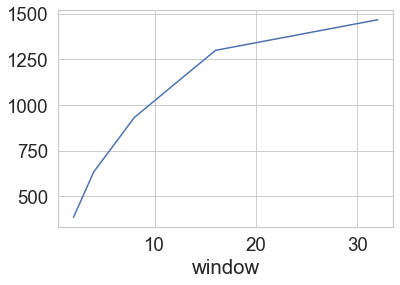

In [414]:
result_df.groupby("window").mse.mean().plot()

## Plot error versus staleness 
Determine for a given level of staleness (time since update), how likely errors are. 

In [565]:
data_dir = use_results("ml-1m", download=False)
filename = f"{data_dir}/round_robin_1_60_split_0.5_results.csv"
df = pd.read_csv(filename)
update_df = pd.read_csv(f"{data_dir}/round_robin_1_60_split_0.5_updates.csv")
df

,Unnamed: 0,y_true,y_pred,user_id,movie_id,timestamp
0,0,4,4.134009,2783,1396,0
1,1,5,1.359328,2783,2901,0
2,2,4,4.235560,3970,3408,1
3,3,4,3.937731,3970,2890,2
4,4,4,1.000000,2782,1265,10
...,...,...,...,...,...,...
16756,16756,3,3.968888,2646,1073,8996
16757,16757,5,4.388333,2646,2028,8998
16758,16758,3,4.036339,2646,1265,9000
16759,16759,5,3.660096,2646,3256,9000


In [566]:
def find_model_ts(x): 
    return x["timestamp"] - update_df[(update_df["key"] == x["user_id"]) & (update_df["time"] <= x["timestamp"])].time.max()

df["staleness"] = df.apply(find_model_ts, axis=1)

In [567]:
df['squared_error'] = (df['y_true'] - df['y_pred']) ** 2

In [610]:
x = df.groupby("staleness").squared_error.mean().index
y = df.groupby("staleness").squared_error.mean().tolist()

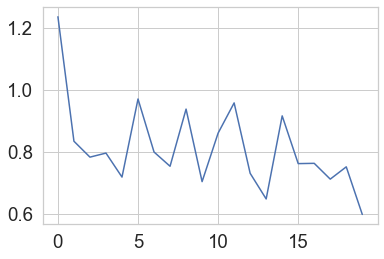

In [612]:
plt.plot(x[:20], y[:20])

In [571]:
df.groupby("staleness").squared_error.count()

staleness
0.0       12427
1.0         675
2.0         449
3.0         277
4.0         216
          ...  
7091.0        1
7092.0        1
7094.0        1
7141.0        1
7143.0        1
Name: squared_error, Length: 285, dtype: int64

In [600]:
user_ids = [2679]

x = df[df["user_id"].isin(user_ids)].groupby("staleness").squared_error.mean().index
y = df[df["user_id"].isin(user_ids)].groupby("staleness").squared_error.mean().tolist()

<AxesSubplot:>

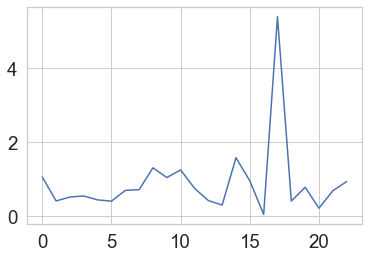

In [609]:
pd.DataFrame({"staleness": x, "error": y}).rolling(1, on="staleness").error.mean().plot()

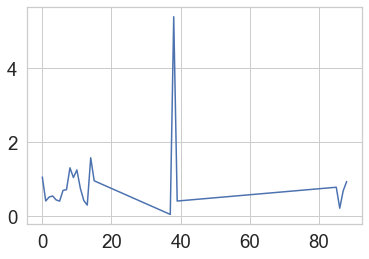

In [602]:
plt.plot(x[:100], y[:100])

In [543]:
df[df["user_id"].isin(user_ids)]

,Unnamed: 0,y_true,y_pred,user_id,movie_id,timestamp,staleness,squared_error
4314,4314,4,1.000000,2753,3447,2956,0.0,9.000000
4315,4315,3,1.000000,2753,1197,2956,0.0,4.000000
4316,4316,4,1.000000,2753,1210,2956,0.0,9.000000
4323,4323,4,3.612666,2753,3101,2957,0.0,0.150027
4324,4324,2,3.627263,2753,2346,2957,0.0,2.647986
...,...,...,...,...,...,...,...,...
5214,5214,4,4.319647,2753,2186,3039,22.0,0.102174
5215,5215,4,4.047712,2753,3551,3039,22.0,0.002276
5216,5216,4,4.494653,2753,2762,3039,22.0,0.244681
5217,5217,4,3.979938,2753,2917,3039,22.0,0.000402


In [544]:
df[df["user_id"].isin(user_ids)].staleness.unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22.])

In [545]:
df[df["user_id"].isin(user_ids)].timestamp.unique()

array([2956, 2957, 2959, 2960, 2961, 2962, 2963, 2964, 2965, 2966, 2967,
       2968, 2969, 2970, 2971, 2972, 2973, 2974, 2975, 2976, 2977, 2978,
       2979, 2980, 2981, 2982, 2983, 2984, 2985, 2986, 2987, 2988, 2989,
       2990, 2991, 2992, 2996, 2997, 2998, 2999, 3000, 3001, 3002, 3003,
       3004, 3005, 3006, 3007, 3008, 3009, 3010, 3011, 3012, 3013, 3014,
       3015, 3016, 3017, 3018, 3020, 3021, 3022, 3023, 3024, 3025, 3026,
       3027, 3028, 3030, 3031, 3032, 3033, 3034, 3037, 3038, 3039])

In [549]:
update_df[update_df["key"].isin(user_ids)]

,Unnamed: 0,policy,runtime,key,i,time
833,833,round_robin,1.0,2753,0,2956
834,834,round_robin,1.0,2753,1,2957
835,835,round_robin,1.0,2753,2,2959
836,836,round_robin,1.0,2753,3,2961
837,837,round_robin,1.0,2753,4,2979
838,838,round_robin,1.0,2753,5,2980
839,839,round_robin,1.0,2753,6,2981
840,840,round_robin,1.0,2753,7,2984
841,841,round_robin,1.0,2753,8,2985
842,842,round_robin,1.0,2753,9,2986
